In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from subprocess import call
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
x = tuple(zip(Outlook, Temperature, Humidity, Wind))
x_enc = OneHotEncoder().fit_transform(x).toarray()

print(x_enc)
le = LabelEncoder()
y_enc = le.fit_transform(Play)

[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]


In [ ]:
print('Features  :  \n')
for pair in x_enc:
  print(pair)

Features  :  

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size = 0.25, random_state = 77)
print("\n\nx_train :- \n\n",x_train,"\n\ny_train :- \n\n",y_train,"\n\n x_test :- \n\n",x_test,"\n\n y_test :-\n\n",y_test)



x_train :- 

 [[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]] 

y_train :- 

 [1 1 1 0 0 1 0 1 1 0] 

 x_test :- 

 [[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]] 

 y_test :-

 [0 1 1 1]


In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(x_train,y_train)
prediction = dtc.predict(x_test)

print("Accuracy : ",metrics.accuracy_score(y_test,prediction))

Accuracy :  0.75


In [ ]:
print(x_test)
print('\ny predicted  :  ', prediction)
print(f'Actual y test  :  {y_test}')


confusion_matrix(y_test, prediction)

print("\n\n",metrics.classification_report(y_test, prediction, zero_division = 0))

[[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]]

y predicted  :   [1 1 1 1]
Actual y test  :  [0 1 1 1]


               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



Confusion Matrix  :  
[[0 1]
 [0 3]]


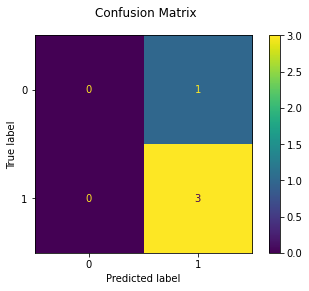

In [ ]:
display = metrics.plot_confusion_matrix(dtc, x_test, y_test)
display.figure_.suptitle('Confusion Matrix')
print(f'Confusion Matrix  :  \n{display.confusion_matrix}')

plt.show()

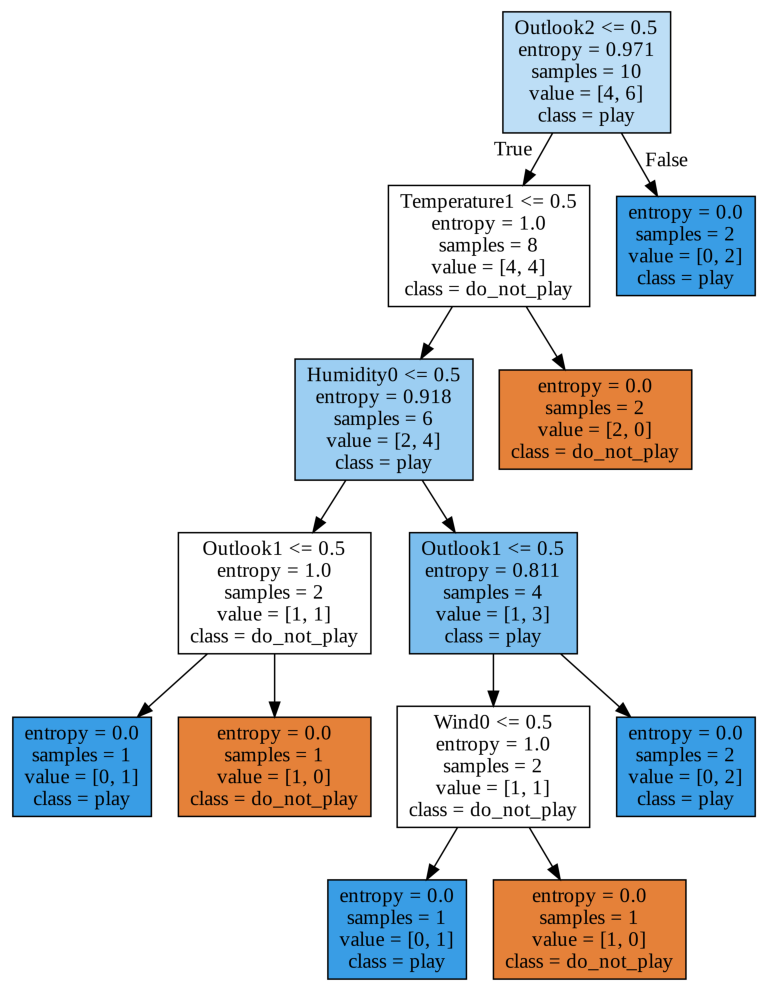

In [ ]:
 
export_graphviz(dtc, out_file='tree_entropy.dot',feature_names = ['Outlook2', 'Outlook1', 'Outlook0', 'Temperature2', 'Temperature1', 'Temperature0', 'Humidity1', 'Humidity0', 'Wind1', 'Wind0'], 
                class_names = ['do_not_play', 'play'], 
                filled = True)

#convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();